<a href="https://colab.research.google.com/github/shaifin/Regression_Project/blob/main/Spotify_Prediction_Project_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify Regression Project**
Datafile must be loaded manually (direct loading from Google Drive doesn't work - maybe because of non-English characters)

Links to data files 

2011-2020 data file (2.9 MB): https://drive.google.com/file/d/1X9OSgSxx-XKCnTL44T1cvwxKPNbZC4Ux/view?usp=sharing

1921-2020 data file (298 MB): https://drive.google.com/file/d/11mlZdp2BPDknLYnXarZkWvEqb3icatuI/view?usp=sharing

Code is using the short 2.9 MB data file as default (this can be changes in "reading the datasets" part).


# **Setup**

In [222]:
# imports for the project
%matplotlib inline
import pandas as pd 
import numpy as np 
import datetime
import seaborn as sns
from sklearn import datasets
from yellowbrick.target.feature_correlation import feature_correlation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#!pip install pydot
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

## **Reading the Datasets**

In [223]:
# Load full data set and drop tracks before 2011
# File can be found in the following link (298MB)
# https://drive.google.com/file/d/11mlZdp2BPDknLYnXarZkWvEqb3icatuI/view?usp=sharing

# data_full = pd.read_csv('data_o.csv',encoding = "Latin-1")
# data_full.shape

# Drop all tracks before 2011
# indexNames = data_full[np.abs(data_full.year)<2011].index
# data_full.drop(indexNames , inplace=True)
# df=data_full

In [224]:
# Load short data set
# File can be found in the following link (2.9MB)
# https://drive.google.com/file/d/1X9OSgSxx-XKCnTL44T1cvwxKPNbZC4Ux/view?usp=sharing

df = pd.read_csv('data_o_10_years.csv',encoding = "Latin-1")
print("The shape of the raw data is:", df.shape)

The shape of the raw data is: (19788, 19)


# **EDA and Preprocessing**

## **Data Inspection and Cleaning**

In [225]:
# Shape of data
df.shape

(19788, 19)

In [226]:
# Type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           19788 non-null  float64
 1   year              19788 non-null  int64  
 2   acousticness      19788 non-null  float64
 3   artists           19788 non-null  object 
 4   danceability      19788 non-null  float64
 5   duration_ms       19788 non-null  int64  
 6   energy            19788 non-null  float64
 7   explicit          19788 non-null  int64  
 8   id                19788 non-null  object 
 9   instrumentalness  19788 non-null  float64
 10  key               19788 non-null  int64  
 11  liveness          19788 non-null  float64
 12  loudness          19788 non-null  float64
 13  mode              19788 non-null  int64  
 14  name              19788 non-null  object 
 15  popularity        19788 non-null  int64  
 16  release_date      19788 non-null  object

In [227]:
# Check for missing values
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [228]:
# Check for duplicate rows
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []


In [229]:
# Drop unique id column
df.drop('id',axis='columns', inplace=True)

In [230]:
# Check for duplicate rows without id column
duplicateRows = df[df.duplicated()]
print(duplicateRows)

       valence  year  acousticness  ... release_date  speechiness    tempo
284     0.0985  2012       0.01520  ...         2012       0.0943  133.954
1947    0.6040  2020       0.53100  ...   20/11/2020       0.3200  180.077
1954    0.9240  2020       0.07850  ...   20/11/2020       0.2520  171.874
1956    0.8660  2020       0.22800  ...   20/11/2020       0.0830  102.218
1957    0.9200  2020       0.15700  ...   20/11/2020       0.1100  173.916
1958    0.9240  2020       0.07850  ...   20/11/2020       0.2520  171.874
1960    0.9200  2020       0.15700  ...   20/11/2020       0.1100  173.916
1961    0.8450  2020       0.01530  ...   20/11/2020       0.0418   96.033
1963    0.8450  2020       0.01530  ...   20/11/2020       0.0418   96.033
1966    0.8660  2020       0.22800  ...   20/11/2020       0.0830  102.218
2740    0.4580  2014       0.11400  ...   04/12/2014       0.0407   95.923
5807    0.9220  2020       0.07540  ...   20/11/2020       0.0864  124.994
5818    0.8140  2020     

In [231]:
# Drop duplicates
df.drop_duplicates(ignore_index=True, inplace=True)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19749 entries, 0 to 19748
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           19749 non-null  float64
 1   year              19749 non-null  int64  
 2   acousticness      19749 non-null  float64
 3   artists           19749 non-null  object 
 4   danceability      19749 non-null  float64
 5   duration_ms       19749 non-null  int64  
 6   energy            19749 non-null  float64
 7   explicit          19749 non-null  int64  
 8   instrumentalness  19749 non-null  float64
 9   key               19749 non-null  int64  
 10  liveness          19749 non-null  float64
 11  loudness          19749 non-null  float64
 12  mode              19749 non-null  int64  
 13  name              19749 non-null  object 
 14  popularity        19749 non-null  int64  
 15  release_date      19749 non-null  object 
 16  speechiness       19749 non-null  float6

In [233]:
# Remove brackets and apostrophes from artist name
df["artists"]=df["artists"].str.replace("[","")
df["artists"]=df["artists"].str.replace("]","")
df["artists"]=df["artists"].str.replace("'","")
# df.head()

In [234]:
# Add column "duration in minutes" and drop "duration_ms"
df["duration_min"] = df["duration_ms"] / 60000
df.drop('duration_ms',axis='columns', inplace=True)

In [235]:
# Adding column with textual values of modality (instead of code) for graphic representation and easier analysis
df['modality'] = np.where(df['mode']== 0, 'Minor', 'Major')
df.drop('mode',axis='columns', inplace=True)

In [236]:
# Adding key names instead of code for graphic representation and easier analysis
conditions = [
    (df['key'] == 0),
    (df['key'] == 1),
    (df['key'] == 2),
    (df['key'] == 3),
    (df['key'] == 4),
    (df['key'] == 5),
    (df['key'] == 6),
    (df['key'] == 7),
    (df['key'] == 8),
    (df['key'] == 9),
    (df['key'] == 10),
    (df['key'] == 11)
    ]
values = ["C","C♯","D","D♯","E","F","F♯","G","G♯","A","A♯","B"]
df['key_name'] = np.select(conditions, values)
df.drop('key',axis='columns', inplace=True)

In [237]:
# Adding column with textual values of explicitness (instead of code) for graphic representation and easier analysis
df['explicit_detailed'] = np.where(df['explicit']== 0, 'Not Explicit or Unkmown', 'Known to be Explicit')
df.drop('explicit',axis='columns', inplace=True)

## **Target and Feature Distribution**

In [238]:
df.describe().transpose()

count         mean  ...          75%          max
valence           19749.0     0.454086  ...     0.630000     0.993000
year              19749.0  2015.508127  ...  2018.000000  2020.000000
acousticness      19749.0     0.261841  ...     0.427000     0.996000
danceability      19749.0     0.609613  ...     0.734000     0.986000
energy            19749.0     0.623627  ...     0.791000     1.000000
instrumentalness  19749.0     0.080618  ...     0.000717     1.000000
liveness          19749.0     0.187391  ...     0.228000     0.989000
loudness          19749.0    -7.479523  ...    -4.896000     1.023000
popularity        19749.0    58.927743  ...    67.000000   100.000000
speechiness       19749.0     0.105029  ...     0.123000     0.950000
tempo             19749.0   120.888211  ...   140.081000   220.099000
duration_min      19749.0     3.701432  ...     4.099467    90.058333

[12 rows x 8 columns]

In [239]:
df.describe(include="O").transpose()

count unique                      top   freq
artists            19749   8912                      BTS    132
name               19749  17068                     Home     14
release_date       19749   2461               01/01/2013    453
modality           19749      2                    Major  12575
key_name           19749     12                       C♯   2427
explicit_detailed  19749      2  Not Explicit or Unkmown  13741

Text(0.5, 1.0, 'Tempo Distribution')

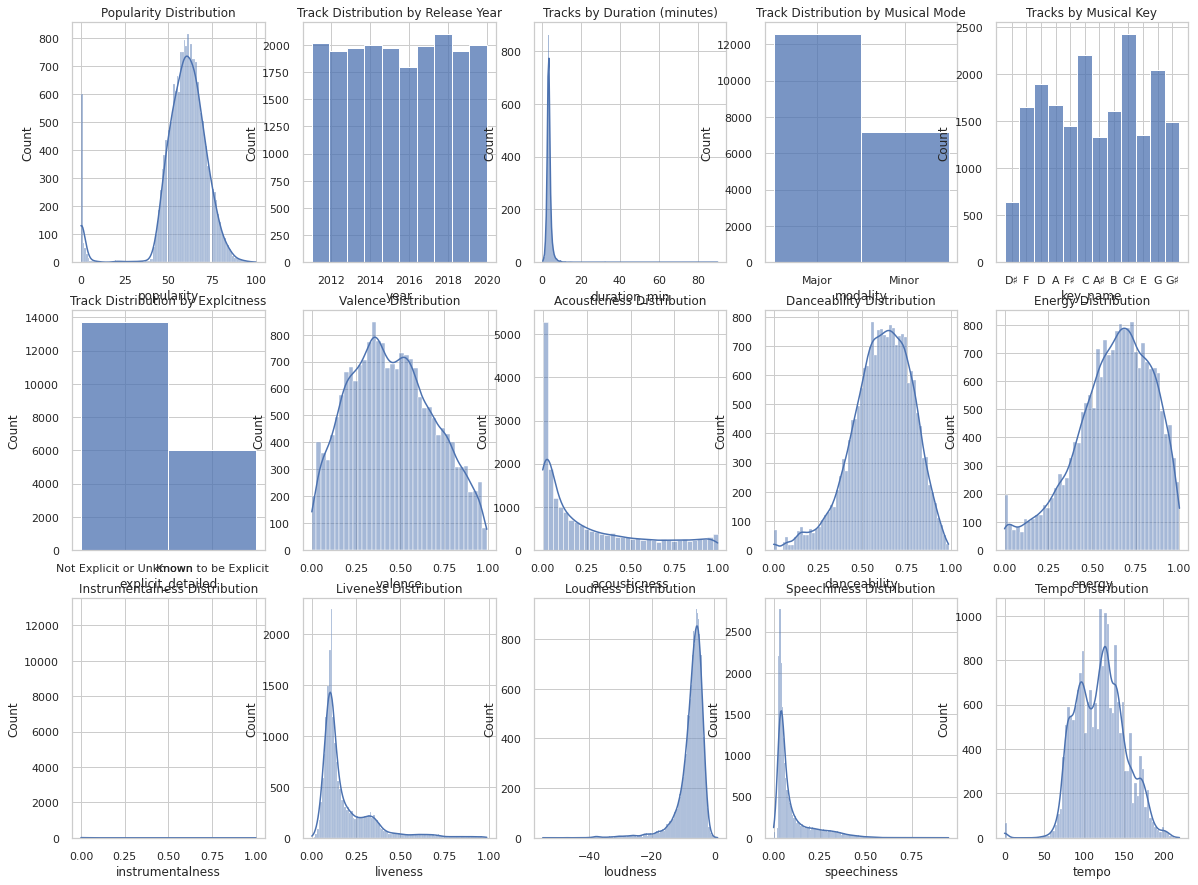

In [240]:
# Visualisations of distribution for each column in the dataframe
fig,ax = plt.subplots(3,5,figsize=(20,15))
sns.histplot(data=df, x="popularity", kde=True,ax=ax[0,0]).set_title('Popularity Distribution')
sns.histplot(data=df, x="year", bins=10, ax=ax[0,1]).set_title('Track Distribution by Release Year')
sns.histplot(data=df, x="duration_min", kde=True, ax=ax[0,2]).set_title('Tracks by Duration (minutes)')
sns.histplot(data=df, x="modality", bins=2, ax=ax[0,3]).set_title('Track Distribution by Musical Mode')
sns.histplot(data=df, x="key_name", bins=12, ax=ax[0,4]).set_title('Tracks by Musical Key')
sns.histplot(data=df, x="explicit_detailed", bins=2, ax=ax[1,0]).set_title('Track Distribution by Explcitness')
sns.histplot(data=df, x="valence", kde=True,ax=ax[1,1]).set_title('Valence Distribution')
sns.histplot(data=df, x="acousticness", kde=True,ax=ax[1,2]).set_title('Acousticness Distribution')
sns.histplot(data=df, x="danceability", kde=True,ax=ax[1,3]).set_title('Danceability Distribution')
sns.histplot(data=df, x="energy", kde=True,ax=ax[1,4]).set_title('Energy Distribution')
sns.histplot(data=df, x="instrumentalness", kde=True, ax=ax[2,0]).set_title('Instrumentalness Distribution')
sns.histplot(data=df, x="liveness", kde=True,ax=ax[2,1]).set_title('Liveness Distribution')
sns.histplot(data=df, x="loudness", kde=True,ax=ax[2,2]).set_title('Loudness Distribution')
sns.histplot(data=df, x="speechiness", kde=True,ax=ax[2,3]).set_title('Speechiness Distribution')
sns.histplot(data=df, x="tempo", kde=True,ax=ax[2,4]).set_title('Tempo Distribution')

In [241]:
# Seperate plots
#sns.set_palette("deep") 
#sns.histplot(data=df, x="popularity", kde=True).set_title('Popularity Distribution')
#sns.histplot(data=df, x="year", bins=10).set_title('Track Distribution by Release Year')
#sns.histplot(data=df, x="duration_min", kde=True).set_title('Tracks by Duration (minutes)')
#sns.histplot(data=df, x="key_name", bins=12).set_title('Tracks by Musical Key')
#sns.histplot(data=df, x="modality", bins=2).set_title('Track Distribution by Musical Mode')
#sns.histplot(data=df, x="explicit_detailed", bins=2).set_title('Track Distribution by Explcitness')
#sns.histplot(data=df, x="valence", kde=True).set_title('Valence Distribution')
#sns.histplot(data=df, x="acousticness", kde=True).set_title('Acousticness Distribution')
#sns.histplot(data=df, x="danceability", kde=True).set_title('Danceability Distribution')
#sns.histplot(data=df, x="energy", kde=True).set_title('Energy Distribution')
#sns.histplot(data=df, x="energy", kde=True).set_title('Energy Distribution')
#sns.histplot(data=df, x="instrumentalness", kde=True).set_title('Instrumentalness Distribution')
#sns.histplot(data=df, x="liveness", kde=True).set_title('Liveness Distribution')
#sns.histplot(data=df, x="loudness", kde=True).set_title('Loudness Distribution')
#sns.histplot(data=df, x="speechiness", kde=True).set_title('Speechiness Distribution')
#sns.histplot(data=df, x="tempo", kde=True).set_title('Tempo Distribution')

Text(0.5, 1.0, 'Popularity Distribution')

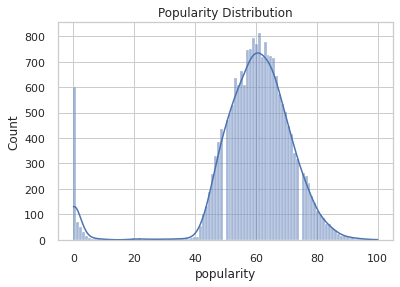

In [242]:
sns.histplot(data=df, x="popularity", kde=True).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Tracks by Duration (minutes)')

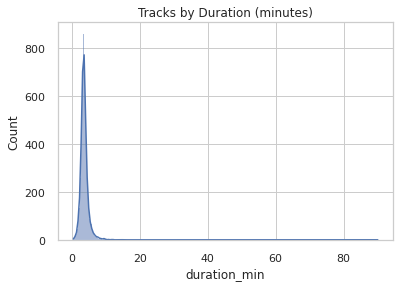

In [243]:
sns.histplot(data=df, x="duration_min", kde=True).set_title('Tracks by Duration (minutes)')

In [244]:
df['duration_min'].describe().transpose()

count    19749.000000
mean         3.701432
std          1.357751
min          0.505017
25%          3.082667
50%          3.561783
75%          4.099467
max         90.058333
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'Tempo Distribution')

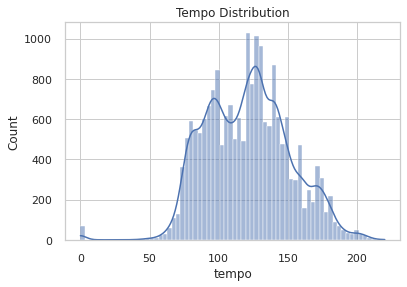

In [245]:
sns.histplot(data=df, x="tempo", kde=True).set_title('Tempo Distribution')

In [246]:
df['tempo'].describe().transpose()

count    19749.000000
mean       120.888211
std         30.285489
min          0.000000
25%         97.031000
50%        120.931000
75%        140.081000
max        220.099000
Name: tempo, dtype: float64

Text(0.5, 1.0, 'Loudness Distribution')

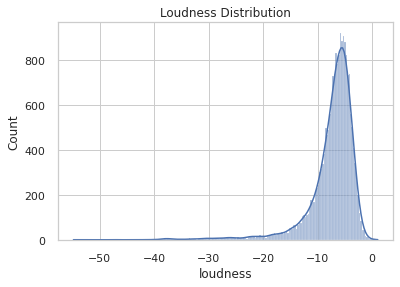

In [247]:
sns.histplot(data=df, x="loudness", kde=True).set_title('Loudness Distribution')

In [248]:
df['loudness'].describe().transpose()

count    19749.000000
mean        -7.479523
std          4.624972
min        -54.837000
25%         -8.530000
50%         -6.421000
75%         -4.896000
max          1.023000
Name: loudness, dtype: float64

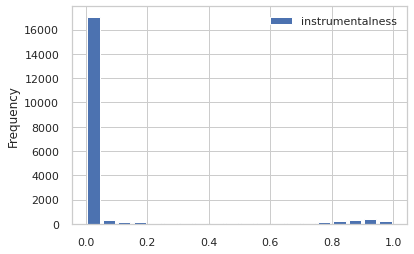

In [249]:
df[['instrumentalness']].plot(kind='hist',bins=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0],rwidth=0.8)
plt.show()

In [250]:
df['instrumentalness'].describe().transpose()

count    19749.000000
mean         0.080618
std          0.235063
min          0.000000
25%          0.000000
50%          0.000002
75%          0.000717
max          1.000000
Name: instrumentalness, dtype: float64

In [251]:
df['instrumentalness_groups'] = list(map((lambda x: "Low" if x < 0.2 else ("High" if x > 0.8 else "Medium")), df.instrumentalness))

Text(0.5, 1.0, 'Track Distribution by Instrumentalness Group')

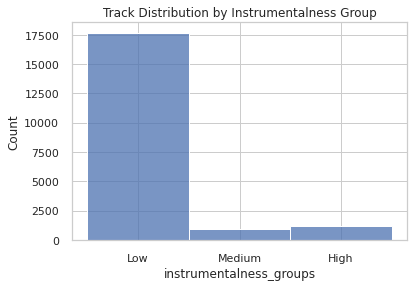

In [252]:
sns.histplot(data=df, x="instrumentalness_groups", bins=2).set_title('Track Distribution by Instrumentalness Group')

In [253]:
df['instrumentalness_groups'].describe().transpose()

count     19749
unique        3
top         Low
freq      17672
Name: instrumentalness_groups, dtype: object

In [254]:
df.drop('instrumentalness',axis='columns', inplace=True)

In [255]:
# Drop tracks where tempo is zero
indexNames = df.loc[df['tempo']==0].index
df.drop(indexNames , inplace=True)
# Dropped 68 tracks

In [256]:
# Drop tracks where duration is outlier on 3 stdev
indexNames = df[np.abs(df.duration_min-df.duration_min.mean())>(3*df.duration_min.std())].index
df.drop(indexNames , inplace=True)
indexNames
# Dropped 265 tracks

Int64Index([  103,   299,   316,   372,   416,   429,   860,  1052,  1198,
             2193,
            ...
            18202, 18271, 18312, 18321, 18327, 18341, 18502, 18714, 18788,
            18812],
           dtype='int64', length=265)

In [257]:
# Drop tracks were loudness is outlier on 3 stdev - NOT USED
# indexNames = df[np.abs(df.loudness-df.loudness.mean())>(3*df.loudness.std())].index
# df.drop(indexNames , inplace=True)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19748
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   valence                  19416 non-null  float64
 1   year                     19416 non-null  int64  
 2   acousticness             19416 non-null  float64
 3   artists                  19416 non-null  object 
 4   danceability             19416 non-null  float64
 5   energy                   19416 non-null  float64
 6   liveness                 19416 non-null  float64
 7   loudness                 19416 non-null  float64
 8   name                     19416 non-null  object 
 9   popularity               19416 non-null  int64  
 10  release_date             19416 non-null  object 
 11  speechiness              19416 non-null  float64
 12  tempo                    19416 non-null  float64
 13  duration_min             19416 non-null  float64
 14  modality              

## **Data Enrichment**

In [259]:
# Added column with feature "scale" (scale = key & mode)
df["scale"] = df["key_name"] + str(" ")+ df["modality"]

In [260]:
# Added feature "release month"
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = pd.DatetimeIndex(df['release_date']).month

In [261]:
# Add feature "release season"
conditions = [
    (df['release_month'] == 1),
    (df['release_month'] == 2),
    (df['release_month'] == 3),
    (df['release_month'] == 4),
    (df['release_month'] == 5),
    (df['release_month'] == 6),
    (df['release_month'] == 7),
    (df['release_month'] == 8),
    (df['release_month'] == 9),
    (df['release_month'] == 10),
    (df['release_month'] == 11),
    (df['release_month'] == 12),
    ]
values_season = ["Winter","Winter","Spring","Spring","Spring","Summer","Summer","Summer","Fall","Fall","Fall","Winter"]
values_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['release_season'] = np.select(conditions, values_season)
df['release_month'] = np.select(conditions, values_month)

In [262]:
# Add feature "days since release"
df['database_date']='2020-12-31 00:00:00'
df['database_date'] = pd.to_datetime(df['database_date'])
df['days_since_release'] = (df['database_date']-df['release_date']).dt.days
df.drop('database_date',axis='columns', inplace=True)
#df.head()

## **Data and Target Scaling**

Text(0.5, 1.0, 'Tempo Distribution')

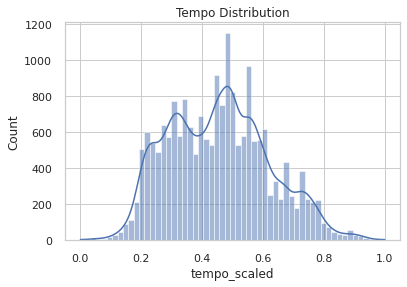

In [263]:
# Scaling tempo feature
scaler = MinMaxScaler() 
df[['tempo_scaled']] = scaler.fit_transform(df[['tempo']])
sns.histplot(data=df, x="tempo_scaled", kde=True).set_title('Tempo Distribution')

Text(0.5, 1.0, 'Tracks by Duration (minutes)')

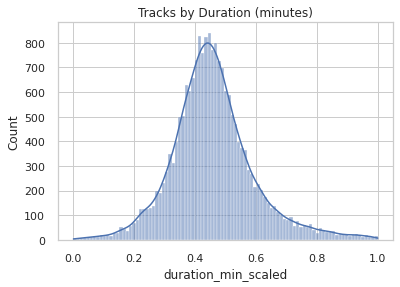

In [264]:
# Scaling duration feature
df[['duration_min_scaled']] = scaler.fit_transform(df[['duration_min']])
sns.histplot(data=df, x="duration_min_scaled", kde=True).set_title('Tracks by Duration (minutes)')

Text(0.5, 1.0, 'Loudness Distribution')

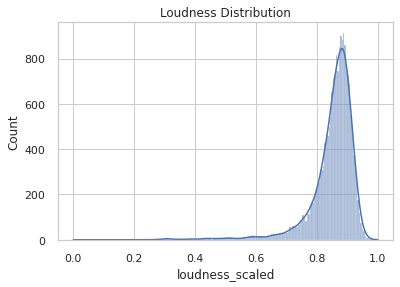

In [265]:
# Scaling loudness feature
df[['loudness_scaled']] = scaler.fit_transform(df[['loudness']])
sns.histplot(data=df, x="loudness_scaled", kde=True).set_title('Loudness Distribution')

Text(0.5, 1.0, 'Days Since Release Distribution')

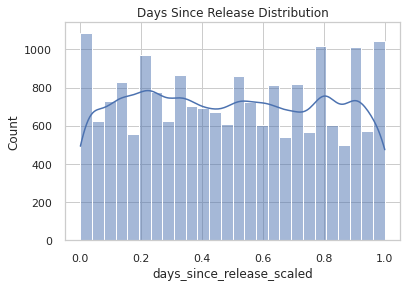

In [266]:
# Scaling days since release feature
df[['days_since_release_scaled']] = scaler.fit_transform(df[['days_since_release']])
sns.histplot(data=df, x="days_since_release_scaled", kde=True).set_title('Days Since Release Distribution')

Text(0.5, 1.0, 'Popularity Distribution')

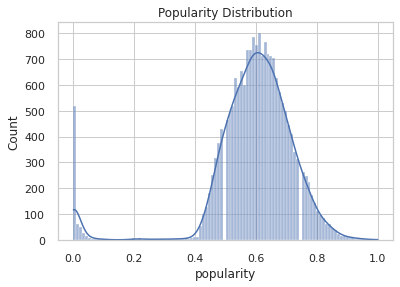

In [267]:
# Scaling popularity (target)
df['popularity']=df['popularity']/100
sns.histplot(data=df, x="popularity", kde=True).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Distribution by Release Month')

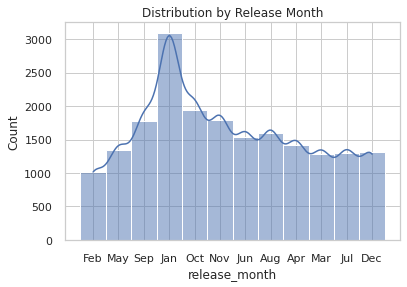

In [268]:
sns.histplot(data=df, x="release_month", kde=True).set_title('Distribution by Release Month')

Text(0.5, 1.0, 'Distribution by Release Season')

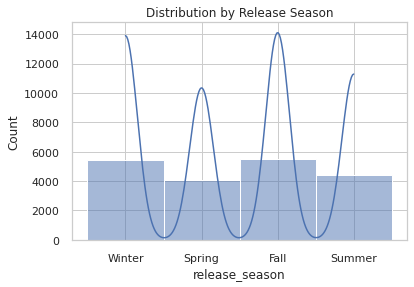

In [269]:
sns.histplot(data=df, x="release_season", kde=True).set_title('Distribution by Release Season')

Text(0.5, 1.0, 'Distribution by Scale')

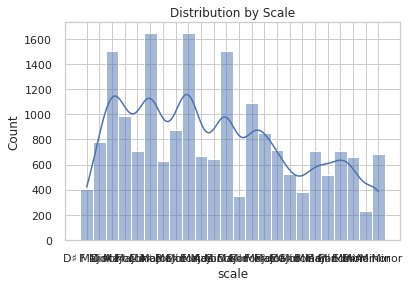

In [270]:
sns.histplot(data=df, x="scale", kde=True).set_title('Distribution by Scale')

In [271]:
# Dropping redundant columns (pre-scaled data)
df.drop('tempo',axis='columns', inplace=True)
df.drop('duration_min',axis='columns', inplace=True)
df.drop('loudness',axis='columns', inplace=True)
df.drop('name',axis='columns', inplace=True)
df.drop('release_date',axis='columns', inplace=True)
df.drop('year',axis='columns', inplace=True)
df.drop('days_since_release',axis='columns', inplace=True)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19748
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valence                    19416 non-null  float64
 1   acousticness               19416 non-null  float64
 2   artists                    19416 non-null  object 
 3   danceability               19416 non-null  float64
 4   energy                     19416 non-null  float64
 5   liveness                   19416 non-null  float64
 6   popularity                 19416 non-null  float64
 7   speechiness                19416 non-null  float64
 8   modality                   19416 non-null  object 
 9   key_name                   19416 non-null  object 
 10  explicit_detailed          19416 non-null  object 
 11  instrumentalness_groups    19416 non-null  object 
 12  scale                      19416 non-null  object 
 13  release_month              19416 non-null  obj

## **Feature Analysis and Selection**

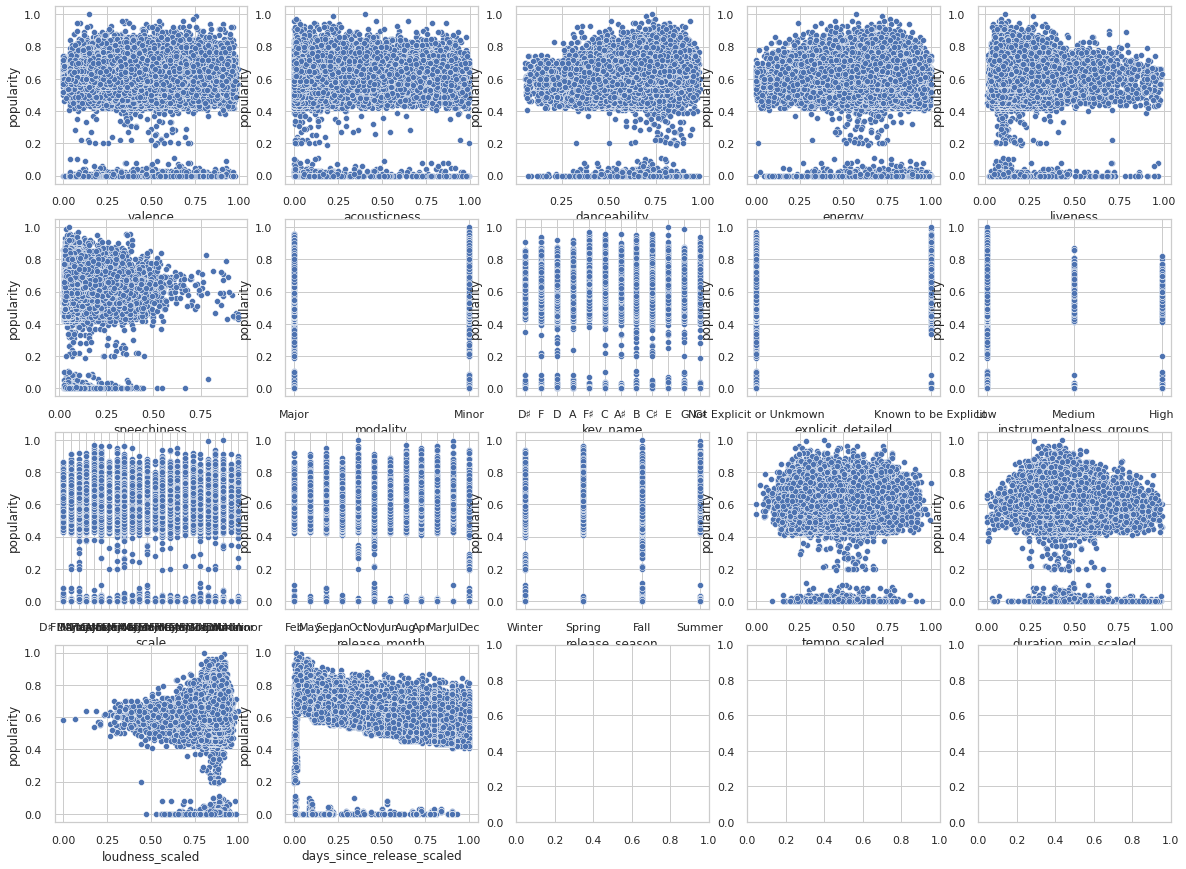

In [273]:
# Scatterplots of features vs. popularity
fig,ax = plt.subplots(4,5,figsize=(20,15))
sns.scatterplot(data=df,x='valence',y='popularity',ax=ax[0,0])
sns.scatterplot(data=df,x='acousticness',y='popularity',ax=ax[0,1])
sns.scatterplot(data=df,x='danceability',y='popularity',ax=ax[0,2])
sns.scatterplot(data=df,x='energy',y='popularity',ax=ax[0,3])
sns.scatterplot(data=df,x='liveness',y='popularity',ax=ax[0,4])
sns.scatterplot(data=df,x='speechiness',y='popularity',ax=ax[1,0])
sns.scatterplot(data=df,x='modality',y='popularity',ax=ax[1,1])
sns.scatterplot(data=df,x='key_name',y='popularity',ax=ax[1,2])
sns.scatterplot(data=df,x='explicit_detailed',y='popularity',ax=ax[1,3])
sns.scatterplot(data=df,x='instrumentalness_groups',y='popularity',ax=ax[1,4])
sns.scatterplot(data=df,x='scale',y='popularity',ax=ax[2,0])
sns.scatterplot(data=df,x='release_month',y='popularity',ax=ax[2,1])
sns.scatterplot(data=df,x='release_season',y='popularity',ax=ax[2,2])
sns.scatterplot(data=df,x='tempo_scaled',y='popularity',ax=ax[2,3])
sns.scatterplot(data=df,x='duration_min_scaled',y='popularity',ax=ax[2,4])
sns.scatterplot(data=df,x='loudness_scaled',y='popularity',ax=ax[3,0])
sns.scatterplot(data=df,x='days_since_release_scaled',y='popularity',ax=ax[3,1])

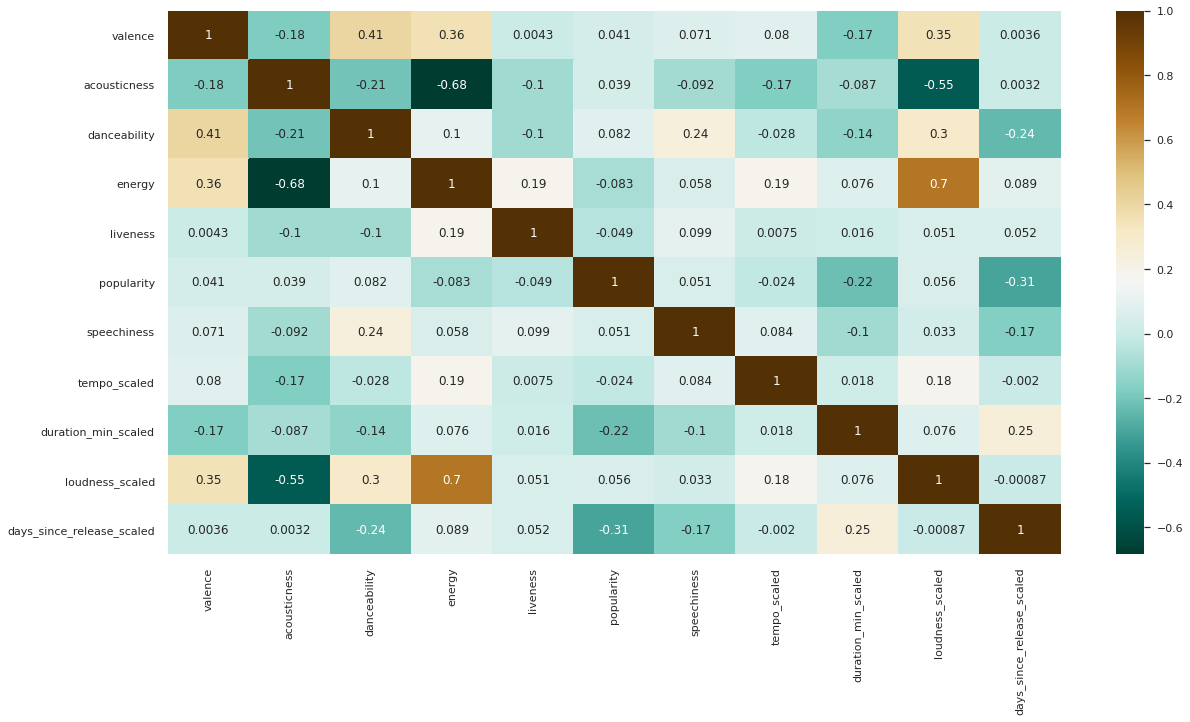

In [274]:
## **Plot Correlations**
corr_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

In [275]:
# Add dummy variables to all categorical featrues in order to check their correlation with popularity
# Added this to a temporary dataframe - the dummy variables are not used in the regression itself
dummy_df=df
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['modality'], prefix='is')],axis=1)
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['key_name'], prefix='is')],axis=1)
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['explicit_detailed'], prefix='is')],axis=1)
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['scale'], prefix='is')],axis=1)
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['release_season'], prefix='released')],axis=1)
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['release_month'], prefix='released')],axis=1)
dummy_df = pd.concat([dummy_df,pd.get_dummies(dummy_df['instrumentalness_groups'], prefix='instr')],axis=1)

In [276]:
dfeatures_0 = ['acousticness', 'danceability', 'energy','liveness', 'loudness_scaled', 'speechiness', 'tempo_scaled', 'valence','duration_min_scaled', 'days_since_release_scaled']
dfeatures_1 = ['is_Known to be Explicit','is_Not Explicit or Unkmown','is_Major','is_Minor','instr_High','instr_Low','instr_Medium']
dfeatures_2 = ['released_Apr','released_Aug','released_Dec','released_Feb','released_Jan','released_Jul','released_Jun','released_Mar','released_May','released_Nov','released_Oct','released_Sep']
dfeatures_3 = ['released_Fall','released_Spring','released_Summer','released_Winter']
dfeatures_4 = ['is_A', 'is_A♯','is_B','is_C','is_C♯','is_D','is_D♯','is_E','is_F','is_F♯','is_G','is_G♯']
dfeatures_5 = ['is_A Major','is_A Minor','is_A♯ Major','is_A♯ Minor','is_B Major','is_B Minor','is_C Major','is_C Minor','is_C♯ Major','is_C♯ Minor','is_D Major','is_D Minor','is_D♯ Major','is_D♯ Minor','is_E Major','is_E Minor','is_F Major','is_F Minor','is_F♯ Major','is_F♯ Minor','is_G Major','is_G Minor','is_G♯ Major','is_G♯ Minor']

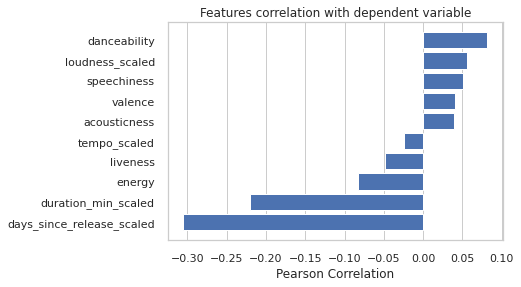

In [277]:
# Correlation of numeric features with popularity
X, y = dummy_df[dfeatures_0], dummy_df['popularity']
features = np.array(dfeatures_0)
visualizer = feature_correlation(X, y,sort=True)

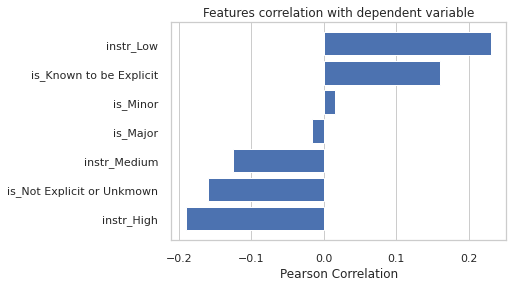

In [278]:
# Correlation of mode, expicit and instrumentalness with popualrity 
X, y = dummy_df[dfeatures_1], dummy_df['popularity']
features = np.array(dfeatures_1)
visualizer = feature_correlation(X, y,sort=True)

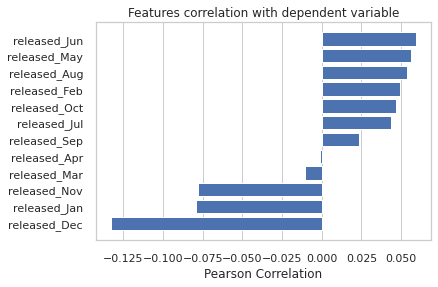

In [279]:
# Correlation of release month with popualrity 
X, y = dummy_df[dfeatures_2], dummy_df['popularity']
features = np.array(dfeatures_2)
visualizer = feature_correlation(X, y,sort=True)

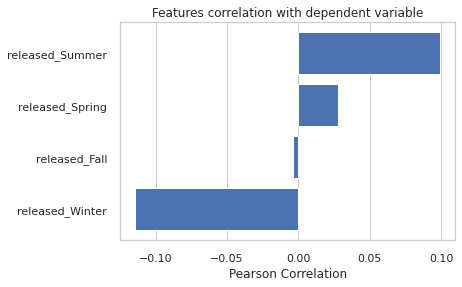

In [280]:
# Correlation of release season with popularity
X, y = dummy_df[dfeatures_3], dummy_df['popularity']
features = np.array(dfeatures_3)
visualizer = feature_correlation(X, y,sort=True)

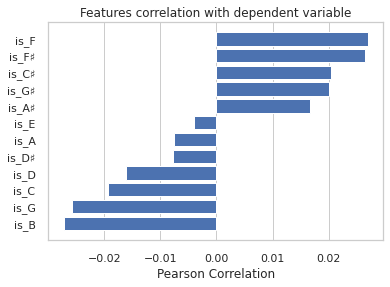

In [281]:
# Correlation of key with popularity
X, y = dummy_df[dfeatures_4], dummy_df['popularity']
features = np.array(dfeatures_4)
visualizer = feature_correlation(X, y,sort=True)

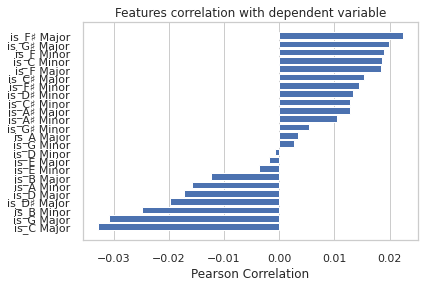

In [282]:
# Correlation of scale with popularity
X, y = dummy_df[dfeatures_5], dummy_df['popularity']
features = np.array(dfeatures_5)
visualizer = feature_correlation(X, y,sort=True)

# **Linear Regression Model**

## **Split the data**

In [65]:
# Split the data into train (80%) and test (20%)
X_train, X_test, y_train, y_test=train_test_split(df,df['popularity'],test_size=0.2,random_state = 21)
X_train.head()

valence  acousticness  ... loudness_scaled  days_since_release_scaled
13288    0.272         0.922  ...        0.625152                   0.318557
14542    0.179         0.117  ...        0.857555                   0.793227
3782     0.728         0.293  ...        0.822216                   0.018172
5670     0.178         0.411  ...        0.790709                   0.190804
16359    0.144         0.891  ...        0.831991                   0.715859

[5 rows x 19 columns]

## **Target Encoding**

In [66]:
# Look at object type columns (categorical features)
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19748
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   artists                  19416 non-null  object
 1   modality                 19416 non-null  object
 2   key_name                 19416 non-null  object
 3   explicit_detailed        19416 non-null  object
 4   instrumentalness_groups  19416 non-null  object
 5   scale                    19416 non-null  object
 6   release_month            19416 non-null  object
 7   release_season           19416 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [67]:
# Target enocde "release season"
season_means = X_train.groupby('release_season')['popularity'].mean()
X_train['season_enc']=X_train['release_season'].map(season_means)
X_test['season_enc']=X_test['release_season'].map(season_means)
season_means

release_season
Fall      0.590752
Spring    0.599563
Summer    0.617804
Winter    0.563598
Name: popularity, dtype: float64

In [68]:
# Target enocde "release month"
month_means = X_train.groupby('release_month')['popularity'].mean()
X_train['month_enc']=X_train['release_month'].map(month_means)
X_test['month_enc']=X_test['release_month'].map(month_means)
month_means

release_month
Apr    0.591183
Aug    0.618209
Dec    0.511941
Feb    0.623445
Jan    0.565928
Jul    0.613778
Jun    0.620769
Mar    0.584581
May    0.623063
Nov    0.557107
Oct    0.611626
Sep    0.601819
Name: popularity, dtype: float64

In [69]:
# Target enocde "modality"
mode_means = X_train.groupby('modality')['popularity'].mean()
X_train['mode_enc']=X_train['modality'].map(mode_means)
X_test['mode_enc']=X_test['modality'].map(mode_means)
mode_means

modality
Major    0.589274
Minor    0.594483
Name: popularity, dtype: float64

In [70]:
# Target enocde "key"
key_means = X_train.groupby('key_name')['popularity'].mean()
X_train['key_enc']=X_train['key_name'].map(key_means)
X_test['key_enc']=X_test['key_name'].map(key_means)
key_means

key_name
A     0.588178
A♯    0.602644
B     0.577196
C     0.580888
C♯    0.599136
D     0.581571
D♯    0.584408
E     0.593166
F     0.604042
F♯    0.603627
G     0.581205
G♯    0.603152
Name: popularity, dtype: float64

In [71]:
# Target enocde "scale"
scale_means = X_train.groupby('scale')['popularity'].mean()
X_train['scale_enc']=X_train['scale'].map(scale_means)
X_test['scale_enc']=X_test['scale'].map(scale_means)
scale_means

scale
A Major     0.594639
A Minor     0.578377
A♯ Major    0.607895
A♯ Minor    0.597927
B Major     0.580414
B Minor     0.574596
C Major     0.572452
C Minor     0.607133
C♯ Major    0.598167
C♯ Minor    0.601439
D Major     0.579720
D Minor     0.589573
D♯ Major    0.568419
D♯ Minor    0.612688
E Major     0.594542
E Minor     0.591758
F Major     0.605200
F Minor     0.602833
F♯ Major    0.607478
F♯ Minor    0.599518
G Major     0.575122
G Minor     0.598832
G♯ Major    0.604819
G♯ Minor    0.598454
Name: popularity, dtype: float64

In [72]:
# Target enocde "explicit"
explicit_means = X_train.groupby('explicit_detailed')['popularity'].mean()
X_train['explicit_enc']=X_train['explicit_detailed'].map(explicit_means)
X_test['explicit_enc']=X_test['explicit_detailed'].map(explicit_means)
explicit_means

explicit_detailed
Known to be Explicit       0.626210
Not Explicit or Unkmown    0.575851
Name: popularity, dtype: float64

In [73]:
# Target enocde "instrumentalness_groups"
instrumentalness_means = X_train.groupby('instrumentalness_groups')['popularity'].mean()
X_train['instrumentalness_enc']=X_train['instrumentalness_groups'].map(instrumentalness_means)
X_test['instrumentalness_enc']=X_test['instrumentalness_groups'].map(instrumentalness_means)
instrumentalness_means

instrumentalness_groups
High      0.471395
Low       0.602602
Medium    0.504062
Name: popularity, dtype: float64

In [74]:
# Target enocde "artists"
training_set_popularity_mean=X_train['popularity'].mean()
artist_means = X_train.groupby('artists')['popularity'].mean()
artist_count = X_train.groupby('artists').size()
X_train['artists_count']=X_train['artists'].map(artist_count)
X_train['artists_enc']=X_train['artists'].map(artist_means)
X_train.loc[X_train['artists_count'] <= 2, 'artists_enc'] = training_set_popularity_mean
X_test['artists_enc']=X_test['artists'].map(artist_means)
X_test['artists_enc'].fillna(training_set_popularity_mean,inplace=True)
#X_test.loc[X_test['artists_enc'] == 'NaN', 'artists_enc'] = training_set_popularity_mean
artist_means

artists
"Adolescents Orquesta"                                                                                                 0.660
"Aulii Cravalho"                                                                                                       0.620
"Aulii Cravalho", Vai Mahina, "Olivia Foai", "Opetaia Foai", Matthew Ineleo                                            0.620
"Bears Den"                                                                                                            0.515
"Childrens Music"                                                                                                      0.580
                                                                                                                       ...  
ã¯ã©ãã«(CV:æ²¢åã¿ãã)                                                                                       0.500
ãã½ã«(CV:æµªå·å¤§è¼)                                                                                           

In [75]:
# Drop categorical from training set
X_train = X_train.select_dtypes(exclude=['object'])
X_train.drop('popularity',axis='columns', inplace=True)
X_train.drop('artists_count',axis='columns', inplace=True)

# Drop categorical from testing set
X_test = X_test.select_dtypes(exclude=['object'])
X_test.drop('popularity',axis='columns', inplace=True)

## **Model Fitting**

In [76]:
# Fit the model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Model Training**

In [77]:
# Train the model (clip results outside of 0,1 range)
y_train_prediction = LR.predict(X_train).clip(0, 1)

# Compute RMSE for training
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_prediction))
print(f"RMSE Training = {RMSE_train:.6f}")

RMSE Training = 0.115688


In [78]:
# Training Metrics
print('Training Metrics')
print(f"RMSE (Training) = {RMSE_train:.6f}")
print('MAE (Training)= ',metrics.mean_absolute_error(y_train, y_train_prediction))
print('MSE (Training)= ',metrics.mean_squared_error(y_train, y_train_prediction))
R2_train=LR.score(X_train, y_train, sample_weight=None)
print('R2 (Training) = ',R2_train)

Training Metrics
RMSE (Training) = 0.115688
MAE (Training)=  0.07643978642463531
MSE (Training)=  0.0133837177160215
R2 (Training) =  0.38475386621806645


In [79]:
# Regression Intercept and Coefficients
print("The model intercept is: {}".format(LR.intercept_))
print("The model coefficients are: {}".format(LR.coef_))

The model intercept is: -1.029784392251027
The model coefficients are: [ 0.03676127  0.006649   -0.08218222 -0.06348338 -0.01094235 -0.05537881
 -0.02032929 -0.12359748  0.04384836 -0.09498588 -0.40543486  0.79260753
  0.03119926 -0.31567021  0.71928881  0.52637467  0.79034135  0.85798357]


In [80]:
# Regression function
formula = 'Popularity = ' + f'{LR.intercept_:.3f}'
for coef, feature in zip(LR.coef_, X_train.columns):
    formula += f'{coef:+.3f}*{feature}'
print(formula)

Popularity = -1.030+0.037*valence+0.007*acousticness-0.082*danceability-0.063*energy-0.011*liveness-0.055*speechiness-0.020*tempo_scaled-0.124*duration_min_scaled+0.044*loudness_scaled-0.095*days_since_release_scaled-0.405*season_enc+0.793*month_enc+0.031*mode_enc-0.316*key_enc+0.719*scale_enc+0.526*explicit_enc+0.790*instrumentalness_enc+0.858*artists_enc


### **Model Prediction**

In [81]:
# Predicting with the model with test data
y_test_prediction = LR.predict(X_test).clip(0, 1)

# Compute RMSE for test
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_prediction))
print(f"RMSE Test = {RMSE_test:.6f}")

RMSE Test = 0.114470


In [83]:
# Test Metrics
print('Test Metrics')
print('RMSE (Test) = ',np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))
print('MAE (Test) = ',metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE (Test) = ',metrics.mean_squared_error(y_test, y_test_prediction))
R2_test =LR.score(X_test, y_test, sample_weight=None)
print('R2 (Test)= ',R2_test)

Test Metrics
RMSE (Test) =  0.11446976146041996
MAE (Test) =  0.07705280547538161
MSE (Test) =  0.013103326288805447
R2 (Test)=  0.34149918564508086


# **Regression Tree Model**

### **Split the Data** (Same split as in Linear Regression Model) 

In [122]:
# Split the data into train (80%) and test (20%) using same random_state
X_train, X_test, y_train, y_test=train_test_split(df,df['popularity'],test_size=0.2,random_state = 21)

### **Target Encoding** (Same as in Linear Regression Model)

In [123]:
# Target enocde "release season"
season_means = X_train.groupby('release_season')['popularity'].mean()
X_train['season_enc']=X_train['release_season'].map(season_means)
X_test['season_enc']=X_test['release_season'].map(season_means)

# Target enocde "release month"
month_means = X_train.groupby('release_month')['popularity'].mean()
X_train['month_enc']=X_train['release_month'].map(month_means)
X_test['month_enc']=X_test['release_month'].map(month_means)

# Target enocde "modality"
mode_means = X_train.groupby('modality')['popularity'].mean()
X_train['mode_enc']=X_train['modality'].map(mode_means)
X_test['mode_enc']=X_test['modality'].map(mode_means)

# Target enocde "key"
key_means = X_train.groupby('key_name')['popularity'].mean()
X_train['key_enc']=X_train['key_name'].map(key_means)
X_test['key_enc']=X_test['key_name'].map(key_means)

# Target enocde "scale"
scale_means = X_train.groupby('scale')['popularity'].mean()
X_train['scale_enc']=X_train['scale'].map(scale_means)
X_test['scale_enc']=X_test['scale'].map(scale_means)

# Target enocde "explicit"
explicit_means = X_train.groupby('explicit_detailed')['popularity'].mean()
X_train['explicit_enc']=X_train['explicit_detailed'].map(explicit_means)
X_test['explicit_enc']=X_test['explicit_detailed'].map(explicit_means)

# Target enocde "instrumentalness_groups"
instrumentalness_means = X_train.groupby('instrumentalness_groups')['popularity'].mean()
X_train['instrumentalness_enc']=X_train['instrumentalness_groups'].map(instrumentalness_means)
X_test['instrumentalness_enc']=X_test['instrumentalness_groups'].map(instrumentalness_means)

# Target enocde "artists"
training_set_popularity_mean=X_train['popularity'].mean()
artist_means = X_train.groupby('artists')['popularity'].mean()
artist_count = X_train.groupby('artists').size()
X_train['artists_count']=X_train['artists'].map(artist_count)
X_train['artists_enc']=X_train['artists'].map(artist_means)
X_train.loc[X_train['artists_count'] <= 2, 'artists_enc'] = training_set_popularity_mean
X_test['artists_enc']=X_test['artists'].map(artist_means)
X_test['artists_enc'].fillna(training_set_popularity_mean,inplace=True)
#X_test.loc[X_test['artists_enc'] == 'NaN', 'artists_enc'] = training_set_popularity_mean

# Drop categorical from training set
X_train = X_train.select_dtypes(exclude=['object'])
X_train.drop('popularity',axis='columns', inplace=True)
X_train.drop('artists_count',axis='columns', inplace=True)

# Drop categorical from testing set
X_test = X_test.select_dtypes(exclude=['object'])
X_test.drop('popularity',axis='columns', inplace=True)

In [124]:
# Check sets

print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (19416, 19)
shape of input - training set (15532, 18)
shape of output - training set (15532,)
shape of input - testing set (3884, 18)
shape of output - testing set (3884,)


### **Model Fitting**

In [132]:
# Instantiate model
rt = DecisionTreeRegressor(random_state=42)

In [133]:
# Fit model
rt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [135]:
# Predict
y_rt_prediction=rt.predict(X_test)

In [136]:
# RMSE
mse_rt=mean_squared_error(y_test, y_rt_prediction)
RMSE_rt=mse_rt**0.5
print(RMSE_rt)

0.13146840396238377


In [137]:
R2_rt=r2_score(y_test, y_rt_prediction)
print(R2_rt)

0.1319721121014208


In [138]:
rt.get_depth()

43

In [139]:
rt.get_n_leaves()

12142

### **Finding Best Tree**

In [183]:
def tree_calc(max_depth, X_train, y_train, X_test, y_test):
  rt=DecisionTreeRegressor(max_depth=max_depth,random_state=42)
  rt.fit(X_train, y_train)
  y_train_rt_prediction=rt.predict(X_train)
  
  mse_rt_train=mean_squared_error(y_train, y_train_rt_prediction)
  RMSE_rt_train=mse_rt_train**0.5
  r2_rt_train=rt.score(X_train, y_train)

  y_test_rt_prediction=rt.predict(X_test)
  mse_rt_test=mean_squared_error(y_test, y_test_rt_prediction)
  RMSE_rt_test=mse_rt_test**0.5
  r2_rt_test=rt.score(X_test, y_test)

  return RMSE_rt_train, RMSE_rt_test, r2_rt_train, r2_rt_test

In [184]:
# Try different trees with max depth from 1 to 50
max_i=50
r2_rt_train_scores =[]
r2_rt_test_scores = []
RMSE_tn_scores =[]
RMSE_tt_scores = []
max_depth = []
for i in range(1,max_i):
  RMSE_tn, RMSE_tt, R2_tn, R2_tt=tree_calc(i, X_train, y_train, X_test, y_test)
  RMSE_tn_scores.append(RMSE_tn)
  RMSE_tt_scores.append(RMSE_tt)
  r2_rt_train_scores.append(R2_tn)
  r2_rt_test_scores.append(R2_tt)
  max_depth.append(i)

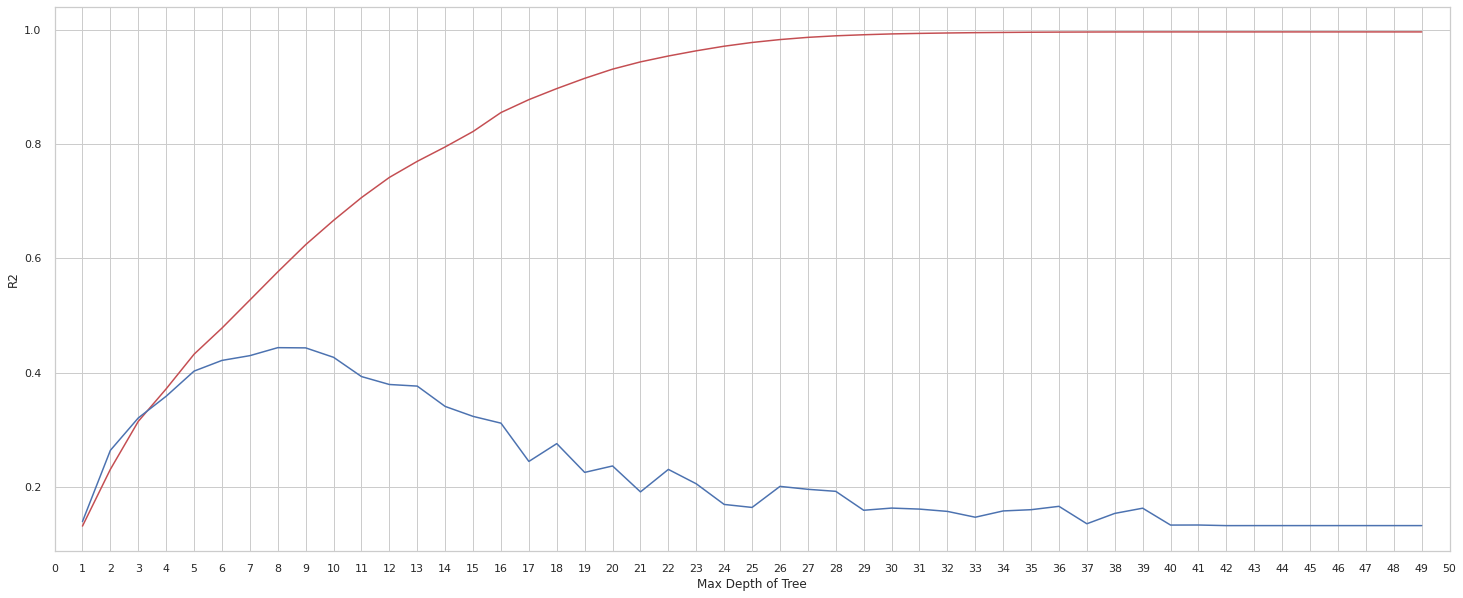

Optimal R2 score is 0.44363983549684305 when max depth = 8


In [185]:
# Plot R2 Scores
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(max_depth, r2_rt_train_scores, 'r', label="Training")
plt.plot(max_depth, r2_rt_test_scores, 'b', label="Testing")
plt.xlabel('Max Depth of Tree')
plt.ylabel('R2')
plt.locator_params(axis='x', nbins=max_i)
plt.xlim([0, max_i])
plt.show()
print("Optimal R2 score is {} when max depth = {}".format(np.max(r2_rt_test_scores),1+r2_rt_test_scores.index(np.max(r2_rt_test_scores))))

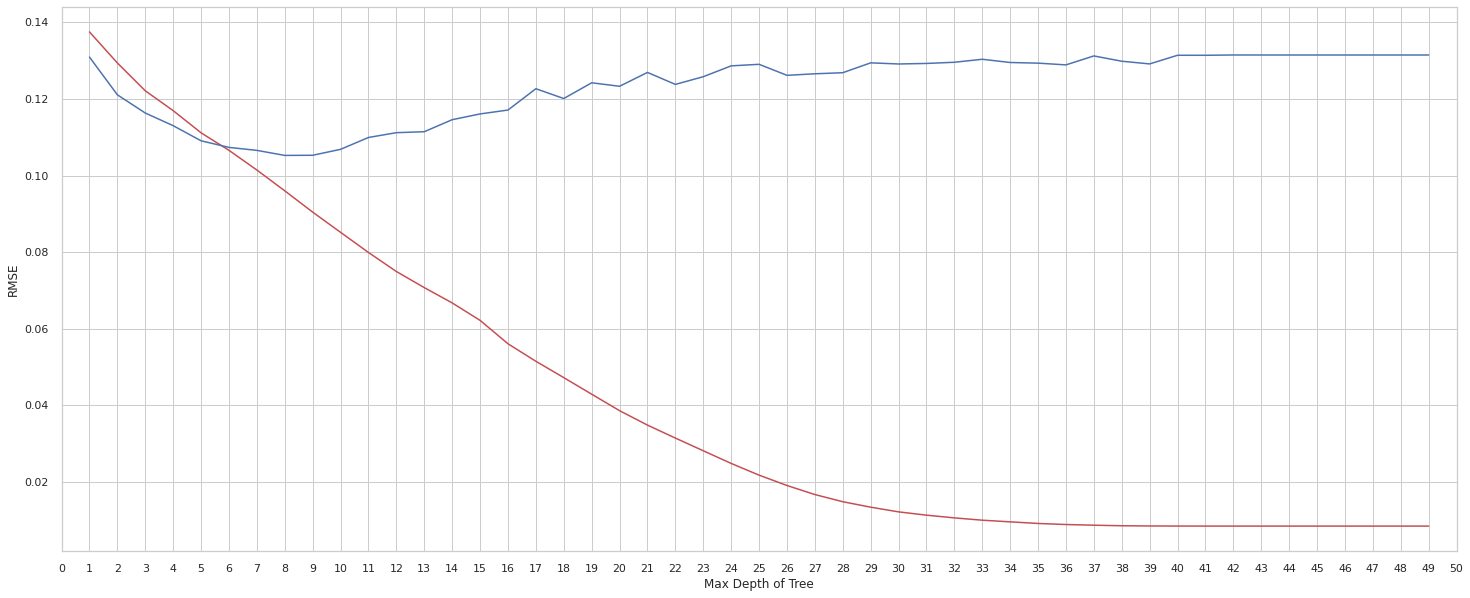

Optimal RMSE score is 0.10525253506234485 when max depth of tree = 8


In [179]:
# Plot RMSE Scores
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(max_depth, RMSE_tn_scores, 'r', label='Training')
plt.plot(max_depth, RMSE_tt_scores, 'b', label='Testing')
plt.xlabel('Max Depth of Tree')
plt.ylabel('RMSE')
plt.locator_params(axis='x', nbins=50)
plt.xlim([0, max_i])
plt.show()
print("Optimal RMSE score is {} when max depth of tree = {}".format(np.min(RMSE_tt_scores),1+RMSE_tt_scores.index(np.min(RMSE_tt_scores))))

In [190]:
# Fitting best tree
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_prediction))
y_test_prediction = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_prediction))

r2_train=r2_score(y_train, y_train_prediction)
r2_test=r2_score(y_test, y_test_prediction)
print('RMSE Scores:',train_rmse,test_rmse)
print('R2 Scores:',r2_train,r2_test )

RMSE Scores: 0.09600551039993539 0.10460379968582541
R2 Scores: 0.5763773449844711 0.4504770713590942


In [191]:
model.get_n_leaves()

140

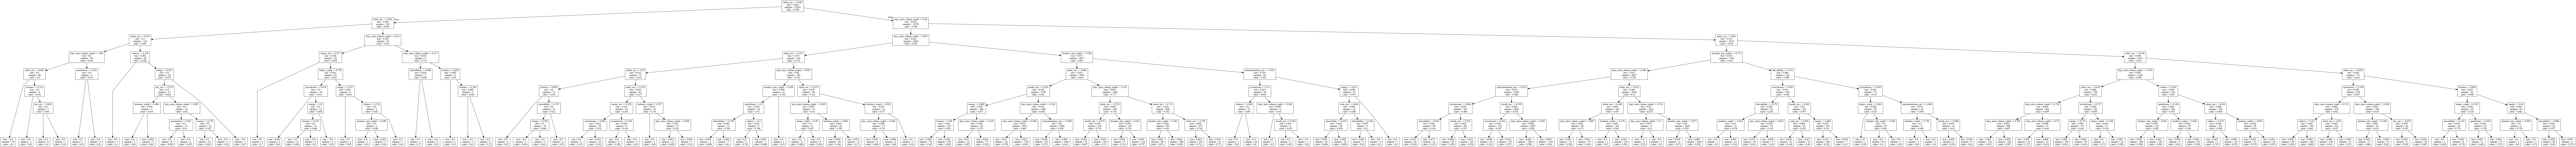

In [187]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1200) 

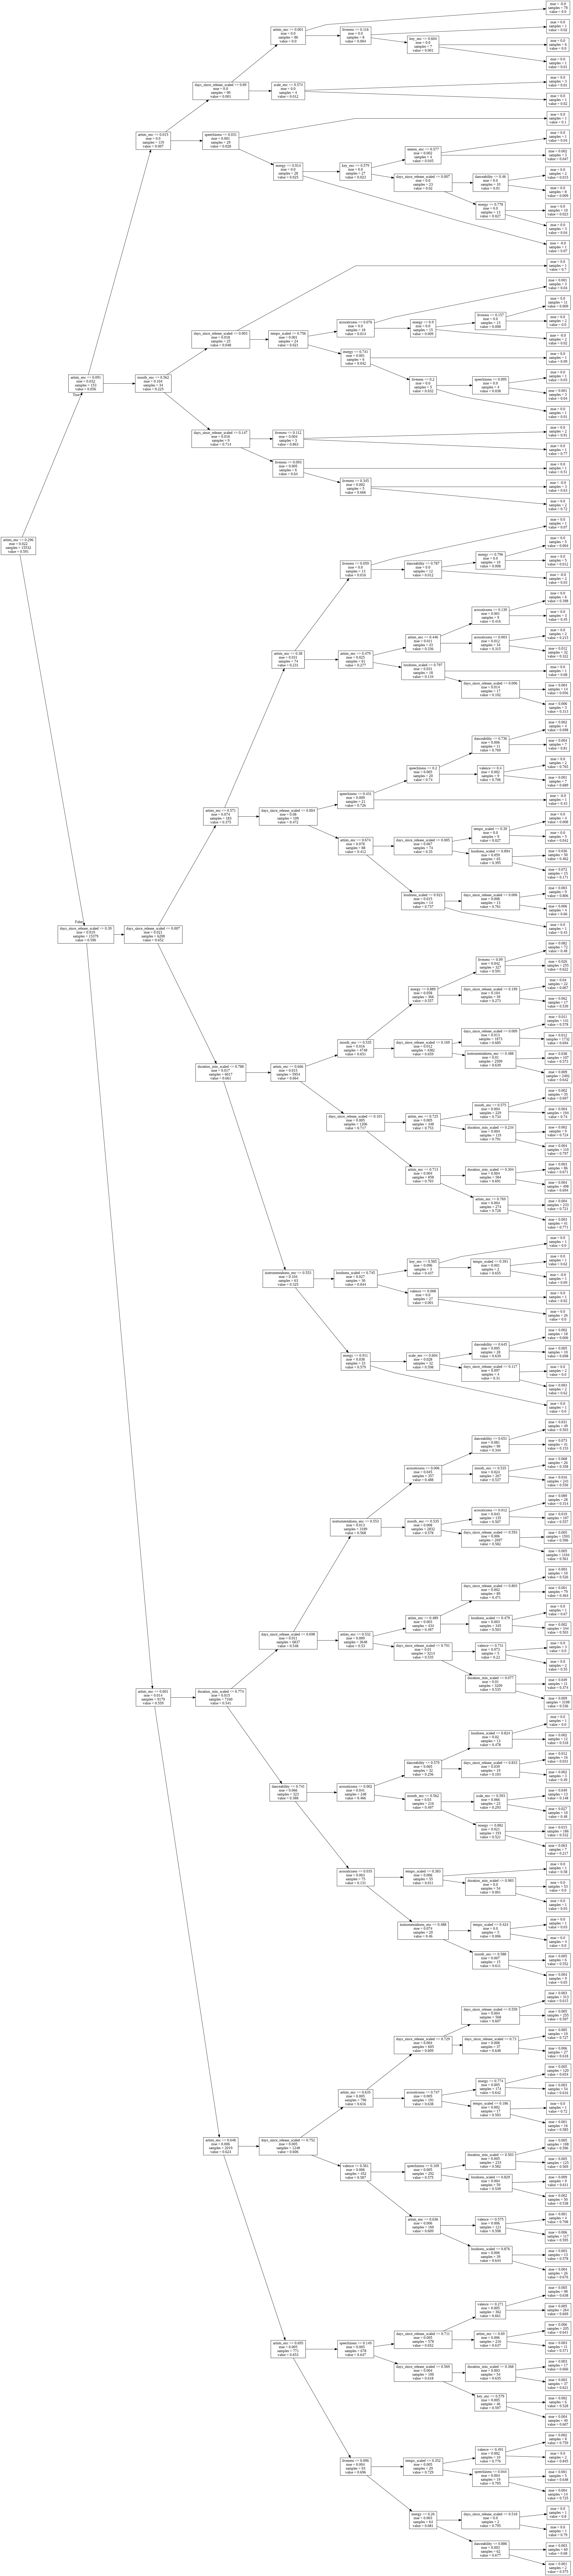

In [193]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, leaves_parallel=True,rotate=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1200) 

In [200]:
for feature, importance in zip(X_train.columns, model.feature_importances_):
    print(f'{feature:12}: {importance}')

valence     : 0.0031948990370934457
acousticness: 0.043377923921411474
danceability: 0.053319630716927864
energy      : 0.02372870277592233
liveness    : 0.006244587815191296
speechiness : 0.0014941185856639444
tempo_scaled: 0.001996110347817438
duration_min_scaled: 0.07962571439065304
loudness_scaled: 0.011857328787358314
days_since_release_scaled: 0.3205214022508086
season_enc  : 1.711320360409428e-07
month_enc   : 0.04747010248325195
mode_enc    : 0.0
key_enc     : 0.001646973731645952
scale_enc   : 0.005129886720165285
explicit_enc: 0.0
instrumentalness_enc: 0.04578924190218557
artists_enc : 0.35460320540186735


# **KNN Model**

In [100]:
# Try KNN with default k=5
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
y_prediction_train = model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_prediction_train) ** 0.5

test_score = model.score(X_test, y_test)
y_prediction_test = model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_prediction_test) ** 0.5

print('RMSE values:',rmse_train,rmse_test)
print('Score values:',train_score,test_score)

RMSE values: 0.09422832965573033 0.11220633028545093
Score values: 0.5919157425743293 0.3676964572714


In [106]:
# Try KNN with default k=5 and cross validation
knn_cv = KNeighborsRegressor(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print(cv_scores)
cv_scores_mean=np.mean(cv_scores)
print('cv scores mean:',cv_scores_mean)

[0.3508229  0.34904667 0.39251452 0.35289435 0.43774316]
cv scores mean: 0.3766043188020136


In [109]:
# Try Grid Search
knn_gs = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_gs, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 11}

In [110]:
knn_gscv.best_score_

0.4024894838678593

In [118]:
# Result with Grid Search
knn_gs = KNeighborsRegressor(n_neighbors=11)
knn_gs.fit(X_train, y_train)
gs_train_score = knn_gs.score(X_train, y_train)
y_pred_test = knn_gs.predict(X_test)
gs_test_score = knn_gs.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
print('RMSE values:',rmse_train,rmse_test)
print('Test scores:',gs_train_score,gs_test_score)

RMSE values: 0.10752546277699146 0.10796177423207885
Test scores: 0.5125613084567294 0.4146293771167779


In [114]:
# Check result with Grid Search K+1
model = KNeighborsRegressor(n_neighbors=12)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
score_train = model.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5

y_pred_test = model.predict(X_test)
score_test = model.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5

print('RMSE values:',rmse_train,rmse_test)
print('Test scores:',score_train,score_test)

RMSE values: 0.10388581935588871 0.10797228515184283
Test scores: 0.5039797635581047 0.41451539078775007


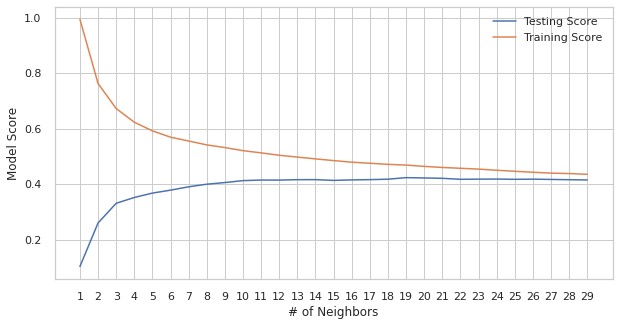

In [117]:
knn_n =[]
train_scores = []
test_scores = []
for i in range(1,30):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    knn_n.append(i)
plt.figure(figsize=[10,5])
plt.plot(knn_n, test_scores, label = 'Testing Score')
plt.plot(knn_n, train_scores, label = 'Training Score')
plt.legend()
plt.title('Model Score vs. Number of Neighbours')
plt.xlabel('# of Neighbors')
plt.ylabel('Model Score')
plt.xticks(knn_n)
plt.show()

In [92]:
print("Best score is {} with k = {}".format(np.max(test_scores),1+test_scores.index(np.max(test_scores))))

Best accuracy is 0.4233324180312525 with K = 19


In [116]:
# Check result with k=19
model = KNeighborsRegressor(n_neighbors=19)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
score_train = model.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5

y_pred_test = model.predict(X_test)
score_test = model.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5

print('RMSE values:',rmse_train,rmse_test)
print('Test scores:',score_train,score_test)

RMSE values: 0.10752546277699146 0.10715620397959436
Test scores: 0.46861474797830943 0.4233324180312525


In [119]:
# Try KNN with default k=19 and cross validation
knn_cv_2 = KNeighborsRegressor(n_neighbors=19)
cv_scores = cross_val_score(knn_cv_2, X_train, y_train, cv=5)
print(cv_scores)
cv_scores_mean=np.mean(cv_scores)
print('cv scores mean:',cv_scores_mean)

[0.37999654 0.3801436  0.40865884 0.39468302 0.42124306]
cv scores mean: 0.3969450127807645


# **Dropping Outliers for Target (Popularity)** 
Just Checking What Happens

In [204]:
# Drop outliers - Popularity (Target)
df2=df
indexNames = df2[np.abs(df.popularity-df.popularity.mean())>(3*df.popularity.std())].index
df.drop(indexNames , inplace=True)

In [ ]:
df2.info()

In [ ]:
# Popularity distribution without oultiers
sns.histplot(data=df2, x="popularity", kde=True).set_title('Popularity Distribution')

In [207]:
# Split the data into train (80%) and test (20%) using same random_state
X_train, X_test, y_train, y_test=train_test_split(df2,df2['popularity'],test_size=0.2,random_state = 21)

In [208]:
# Target enocde "release season"
season_means = X_train.groupby('release_season')['popularity'].mean()
X_train['season_enc']=X_train['release_season'].map(season_means)
X_test['season_enc']=X_test['release_season'].map(season_means)

# Target enocde "release month"
month_means = X_train.groupby('release_month')['popularity'].mean()
X_train['month_enc']=X_train['release_month'].map(month_means)
X_test['month_enc']=X_test['release_month'].map(month_means)

# Target enocde "modality"
mode_means = X_train.groupby('modality')['popularity'].mean()
X_train['mode_enc']=X_train['modality'].map(mode_means)
X_test['mode_enc']=X_test['modality'].map(mode_means)

# Target enocde "key"
key_means = X_train.groupby('key_name')['popularity'].mean()
X_train['key_enc']=X_train['key_name'].map(key_means)
X_test['key_enc']=X_test['key_name'].map(key_means)

# Target enocde "scale"
scale_means = X_train.groupby('scale')['popularity'].mean()
X_train['scale_enc']=X_train['scale'].map(scale_means)
X_test['scale_enc']=X_test['scale'].map(scale_means)

# Target enocde "explicit"
explicit_means = X_train.groupby('explicit_detailed')['popularity'].mean()
X_train['explicit_enc']=X_train['explicit_detailed'].map(explicit_means)
X_test['explicit_enc']=X_test['explicit_detailed'].map(explicit_means)

# Target enocde "instrumentalness_groups"
instrumentalness_means = X_train.groupby('instrumentalness_groups')['popularity'].mean()
X_train['instrumentalness_enc']=X_train['instrumentalness_groups'].map(instrumentalness_means)
X_test['instrumentalness_enc']=X_test['instrumentalness_groups'].map(instrumentalness_means)

# Target enocde "artists"
training_set_popularity_mean=X_train['popularity'].mean()
artist_means = X_train.groupby('artists')['popularity'].mean()
artist_count = X_train.groupby('artists').size()
X_train['artists_count']=X_train['artists'].map(artist_count)
X_train['artists_enc']=X_train['artists'].map(artist_means)
X_train.loc[X_train['artists_count'] <= 2, 'artists_enc'] = training_set_popularity_mean
X_test['artists_enc']=X_test['artists'].map(artist_means)
X_test['artists_enc'].fillna(training_set_popularity_mean,inplace=True)
#X_test.loc[X_test['artists_enc'] == 'NaN', 'artists_enc'] = training_set_popularity_mean

# Drop categorical from training set
X_train = X_train.select_dtypes(exclude=['object'])
X_train.drop('popularity',axis='columns', inplace=True)
X_train.drop('artists_count',axis='columns', inplace=True)

# Drop categorical from testing set
X_test = X_test.select_dtypes(exclude=['object'])
X_test.drop('popularity',axis='columns', inplace=True)

In [209]:
# Check sets

print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (18719, 19)
shape of input - training set (14975, 18)
shape of output - training set (14975,)
shape of input - testing set (3744, 18)
shape of output - testing set (3744,)


In [217]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
# Training Metrics
print('Training Metrics')
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_prediction))
print(f"RMSE (Training) = {RMSE_train:.6f}")
R2_train=LR.score(X_train, y_train, sample_weight=None)
print('R2 (Training) = ',R2_train)

Training Metrics
RMSE (Training) = 0.071141
R2 (Training) =  0.43374204839395725


In [221]:
# Test Metrics
print('Test Metrics')
print('RMSE (Test) = ',np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))
R2_test =LR.score(X_test, y_test, sample_weight=None)
print('R2 (Test)= ',R2_test)

Test Metrics
RMSE (Test) =  0.07338794536993097
R2 (Test)=  0.38187721279973863


In [210]:
def tree_calc(max_depth, X_train, y_train, X_test, y_test):
  rt=DecisionTreeRegressor(max_depth=max_depth,random_state=42)
  rt.fit(X_train, y_train)
  y_train_rt_prediction=rt.predict(X_train)
  
  mse_rt_train=mean_squared_error(y_train, y_train_rt_prediction)
  RMSE_rt_train=mse_rt_train**0.5
  r2_rt_train=rt.score(X_train, y_train)

  y_test_rt_prediction=rt.predict(X_test)
  mse_rt_test=mean_squared_error(y_test, y_test_rt_prediction)
  RMSE_rt_test=mse_rt_test**0.5
  r2_rt_test=rt.score(X_test, y_test)

  return RMSE_rt_train, RMSE_rt_test, r2_rt_train, r2_rt_test

In [211]:
# Try different trees with max depth from 1 to 50
max_i=50
r2_rt_train_scores =[]
r2_rt_test_scores = []
RMSE_tn_scores =[]
RMSE_tt_scores = []
max_depth = []
for i in range(1,max_i):
  RMSE_tn, RMSE_tt, R2_tn, R2_tt=tree_calc(i, X_train, y_train, X_test, y_test)
  RMSE_tn_scores.append(RMSE_tn)
  RMSE_tt_scores.append(RMSE_tt)
  r2_rt_train_scores.append(R2_tn)
  r2_rt_test_scores.append(R2_tt)
  max_depth.append(i)

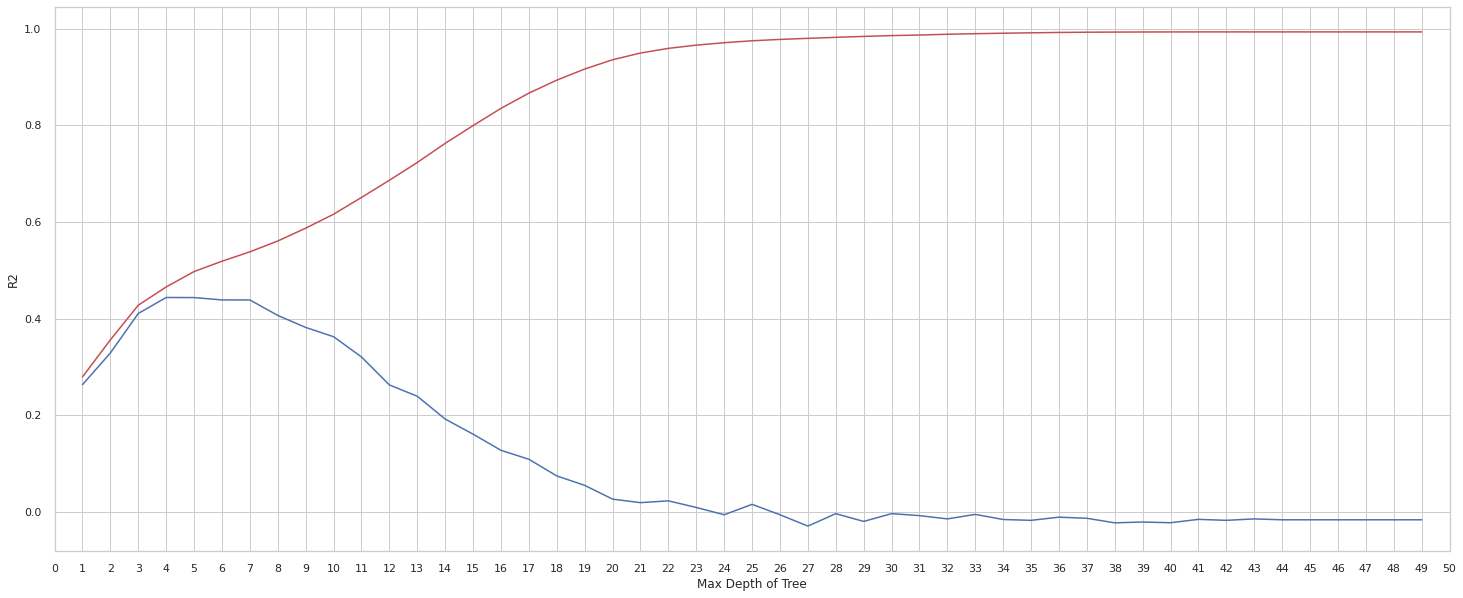

Optimal R2 score is 0.443958776444066 when max depth = 4


In [212]:
# Plot R2 Scores
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(max_depth, r2_rt_train_scores, 'r', label="Training")
plt.plot(max_depth, r2_rt_test_scores, 'b', label="Testing")
plt.xlabel('Max Depth of Tree')
plt.ylabel('R2')
plt.locator_params(axis='x', nbins=max_i)
plt.xlim([0, max_i])
plt.show()
print("Optimal R2 score is {} when max depth = {}".format(np.max(r2_rt_test_scores),1+r2_rt_test_scores.index(np.max(r2_rt_test_scores))))

In [213]:
# Fitting best tree
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_prediction))
y_test_prediction = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_prediction))

r2_train=r2_score(y_train, y_train_prediction)
r2_test=r2_score(y_test, y_test_prediction)
print('RMSE Scores:',train_rmse,test_rmse)
print('R2 Scores:',r2_train,r2_test )

RMSE Scores: 0.06265269677931473 0.07338794536993097
R2 Scores: 0.5608118210283689 0.4013643637677612


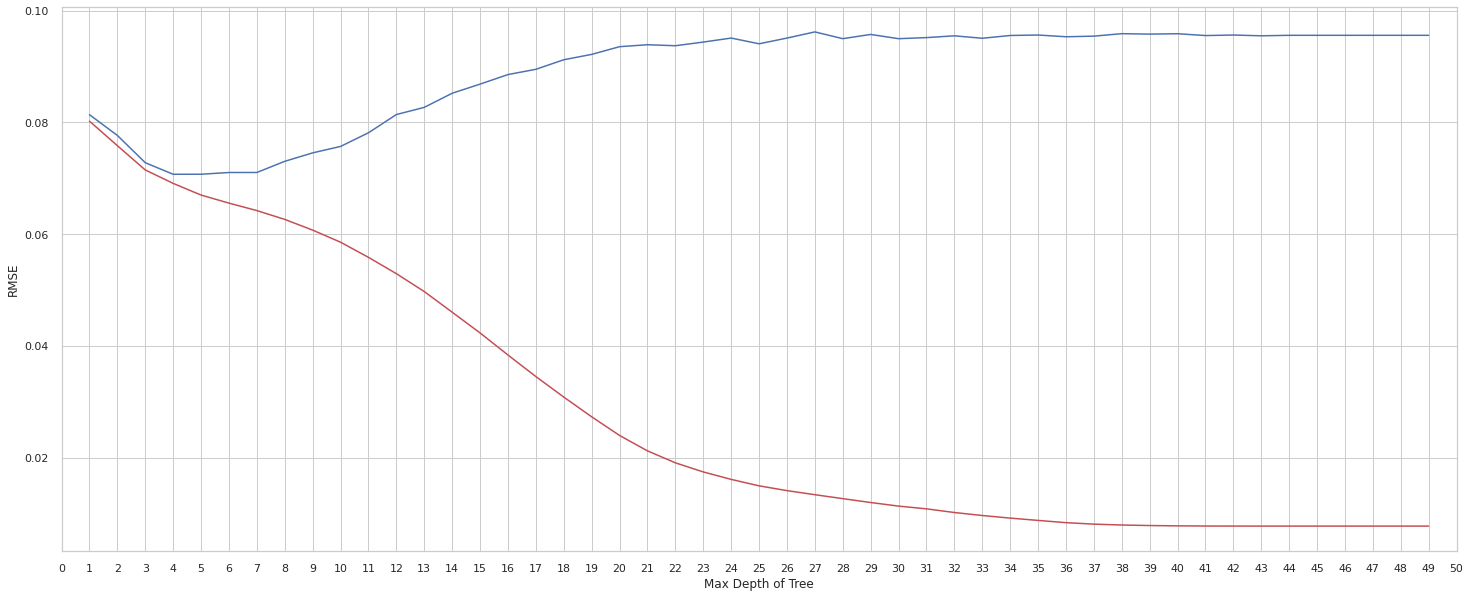

Optimal RMSE score is 0.0707289060433694 when max depth of tree = 4


In [214]:
# Plot RMSE Scores
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(max_depth, RMSE_tn_scores, 'r', label='Training')
plt.plot(max_depth, RMSE_tt_scores, 'b', label='Testing')
plt.xlabel('Max Depth of Tree')
plt.ylabel('RMSE')
plt.locator_params(axis='x', nbins=50)
plt.xlim([0, max_i])
plt.show()
print("Optimal RMSE score is {} when max depth of tree = {}".format(np.min(RMSE_tt_scores),1+RMSE_tt_scores.index(np.min(RMSE_tt_scores))))

In [215]:
model.get_n_leaves()

222